# Problem Set 2 CS129.18

The following problem set will revolve around the Pokemon stats dataset.
The dataset `data/Pokemon.csv` has **721** rows and **27** columns. Not all columns are needed for the questions to be asked.


## Requirements


>Gotta catch 'em all.

Using the lessons on Logistic Regression, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. How many Legendary Pokemon are there? ( 1pt )

2. Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP) ( 3pts )

3. Build a binary classifier for whether Pokemon are Fire Type or not. ( 4pts )

4. Describe the attributes and stats of all Legendary Type pokemon using boxplots. ( 5pts )

5. Solve for the probabilities of each Pokemon being a Fire Type. ( 2pts )

6. What is the accuracy of your model?( 2pts )

7. Apply upsampling for the minority class that is Fire Type and show the change in Accuracy and Precision. ( 3pts )



-----


Bonus 1 : What is the difference between machine learning and pattern recognition? (1pt)



Bonus 2:  Who is your favorite Pokemon?

In [99]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

import warnings

warnings.filterwarnings(action="ignore")

In [100]:
df = pd.read_csv("Pokemon.csv")

KeyError: "None of ['name'] are in the columns"

In [101]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Number            721 non-null    int64  
 1   Name              721 non-null    object 
 2   Type_1            721 non-null    object 
 3   Type_2            350 non-null    object 
 4   Total             721 non-null    int64  
 5   HP                721 non-null    int64  
 6   Attack            721 non-null    int64  
 7   Defense           721 non-null    int64  
 8   Sp_Atk            721 non-null    int64  
 9   Sp_Def            721 non-null    int64  
 10  Speed             721 non-null    int64  
 11  Generation        721 non-null    int64  
 12  isLegendary       721 non-null    bool   
 13  Color             721 non-null    object 
 14  hasGender         721 non-null    bool   
 15  Pr_Male           644 non-null    float64
 16  Egg_Group_1       721 non-null    object 
 1

## PS 2.1 Number of Legendary Pokemon

I just used the same code we used in the lesson.

In [103]:
print('PS 2.1 Number of Legendary Pokemon')
len(df[df.isLegendary == True])

PS 2.1 Number of Legendary Pokemon


46

## PS 2.2 Pokemon with the highest attack-to-HP ratio

I made a column that had the computation for dividing attack by its HP to solve for its ratio

In [104]:
print('PS 2.2 Pokemon with the highest attack-to-HP ratio')

df['AttHpRatio'] = df['Attack']/df['HP']
df[['Name','AttHpRatio']].sort_values(by='AttHpRatio', ascending=False)

PS 2.2 Pokemon with the highest attack-to-HP ratio


,Name,AttHpRatio
291,Shedinja,90.000000
49,Diglett,5.500000
97,Krabby,3.500000
385,Deoxys,3.000000
139,Kabuto,2.666667
...,...,...
359,Wynaut,0.242105
201,Wobbuffet,0.173684
439,Happiny,0.050000
241,Blissey,0.039216


## PS 2.3 Binary classifier for whether Pokemon are Fire Type or not

I tried different methods of making binary classifiers for the Types but I settled for this line of code since it was just one line.

In [105]:
print('PS 2.3 Binary classifier for whether Pokemon are Fire Type or not')
# CREATE A BOOL COLUMN FOR isFire
'''
df1 = df.Type_1.str.get_dummies()
df1.columns = ['is' + col for col in df1.columns]
df2 = df.Type_2.str.get_dummies()
df2.columns = ['is' + col for col in df2.columns]
columns = [col for col in df1.columns]
'''

df['isFire'] = (df['Type_1'] == 'Fire') | (df['Type_2'] == 'Fire')

'''
print(len(df[df.isFire == True]))
df['isFire']

data = df
def updateTypeColumn(dataframe, columnName, columnValue):
    for index, row in dataframe.iterrows():
        if row.Type_1 == columnValue:
            dataframe.loc[index, columnName] = 1
        else:
            dataframe.loc[index, columnName] = 0
            
updateTypeColumn(data, 'Type_1', 'isFire')
data['Type_1'] = data['Type_1'].apply(bool)
df['isFire']'''

#data['Type_1'] = data['Type_1'].apply(bool)
df['isFire']

PS 2.3 Binary classifier for whether Pokemon are Fire Type or not


0      False
1      False
2      False
3       True
4       True
       ...  
716    False
717    False
718    False
719    False
720     True
Name: isFire, Length: 721, dtype: bool

## PS 2.4 Attributes and stats of all Legendary Type pokemon using boxplots

I used the code presented in one of the lecture notebooks

PS 2.4 Attributes and stats of all Legendary Type pokemon using boxplots


<AxesSubplot:>

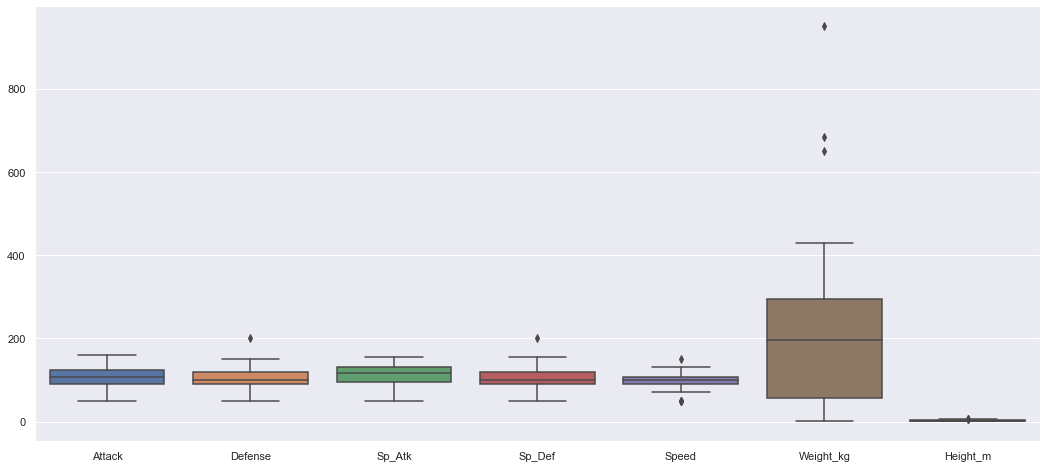

In [106]:
print('PS 2.4 Attributes and stats of all Legendary Type pokemon using boxplots')
plt.figure(figsize=(18,8))
df3 = df[(df['isLegendary'] ==True)]
df3 = df3[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]
sns.boxplot(data = df3)

## PS 2.5 Probability of each Pokemon being a Fire Type

1) Identified the categorical variables and turned them all into binary columns
2) Looked for the correlation of each feature
3) Settled for the following features:
    - "Sp_Atk", "body_style_quadruped", "Color_Red",'Color_Blue"
    - "body_style_with_fins"

\*however, I have not been able to justify certain features logically

### Input Additional variables

In [107]:
d = [df.dtypes]
d

[Number                int64
 Name                 object
 Type_1               object
 Type_2               object
 Total                 int64
 HP                    int64
 Attack                int64
 Defense               int64
 Sp_Atk                int64
 Sp_Def                int64
 Speed                 int64
 Generation            int64
 isLegendary            bool
 Color                object
 hasGender              bool
 Pr_Male             float64
 Egg_Group_1          object
 Egg_Group_2          object
 hasMegaEvolution       bool
 Height_m            float64
 Weight_kg           float64
 Catch_Rate            int64
 Body_Style           object
 AttHpRatio          float64
 isFire                 bool
 dtype: object]

In [108]:
df[['Pr_Male', 'Egg_Group_1', 'Egg_Group_2', 'Catch_Rate', 'Body_Style']]

,Pr_Male,Egg_Group_1,Egg_Group_2,Catch_Rate,Body_Style
0,0.875,Monster,Grass,45,quadruped
1,0.875,Monster,Grass,45,quadruped
2,0.875,Monster,Grass,45,quadruped
3,0.875,Monster,Dragon,45,bipedal_tailed
4,0.875,Monster,Dragon,45,bipedal_tailed
...,...,...,...,...,...
716,NaN,Undiscovered,NaN,45,two_wings
717,NaN,Undiscovered,NaN,3,serpentine_body
718,NaN,Undiscovered,NaN,3,head_arms
719,NaN,Undiscovered,NaN,3,head_only


In [109]:
col = pd.get_dummies(df.Color,prefix='Color')
col2 = pd.get_dummies(df.Body_Style,prefix='body_style')
col3 = pd.get_dummies(df.Egg_Group_1,prefix='Egg_Group')
df = df.join(col)
df = df.join(col2)
df = df.join(col3)
df.dtypes

Number                     int64
Name                      object
Type_1                    object
Type_2                    object
Total                      int64
                           ...  
Egg_Group_Monster          uint8
Egg_Group_Undiscovered     uint8
Egg_Group_Water_1          uint8
Egg_Group_Water_2          uint8
Egg_Group_Water_3          uint8
Length: 64, dtype: object

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number                       721 non-null    int64  
 1   Name                         721 non-null    object 
 2   Type_1                       721 non-null    object 
 3   Type_2                       350 non-null    object 
 4   Total                        721 non-null    int64  
 5   HP                           721 non-null    int64  
 6   Attack                       721 non-null    int64  
 7   Defense                      721 non-null    int64  
 8   Sp_Atk                       721 non-null    int64  
 9   Sp_Def                       721 non-null    int64  
 10  Speed                        721 non-null    int64  
 11  Generation                   721 non-null    int64  
 12  isLegendary                  721 non-null    bool   
 13  Color               

<AxesSubplot:>

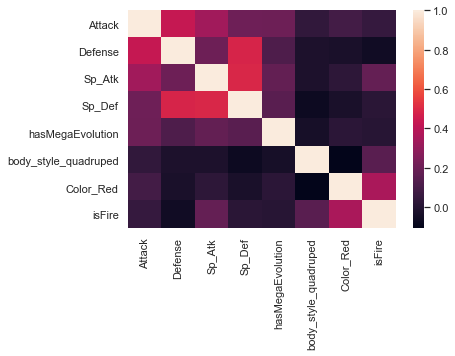

In [111]:
# plt.subplots(figsize = (18,5))
sns.heatmap(df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "hasMegaEvolution", "body_style_quadruped", "Color_Red","isFire"]].corr(method='pearson'))

<AxesSubplot:>

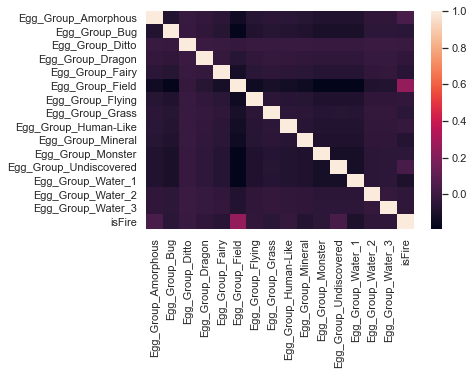

In [112]:
sns.heatmap(df[[
'Egg_Group_Amorphous', 
'Egg_Group_Bug',  
'Egg_Group_Ditto', 
'Egg_Group_Dragon',
'Egg_Group_Fairy', 
'Egg_Group_Field',
'Egg_Group_Flying',
'Egg_Group_Grass',
'Egg_Group_Human-Like',
'Egg_Group_Mineral',
'Egg_Group_Monster', 
'Egg_Group_Undiscovered',
'Egg_Group_Water_1',
'Egg_Group_Water_2',
'Egg_Group_Water_3',
    'isFire'
]].corr(method='pearson'))

In [113]:
df[[
'Egg_Group_Amorphous', 
'Egg_Group_Bug',  
'Egg_Group_Ditto', 
'Egg_Group_Dragon',
'Egg_Group_Fairy', 
'Egg_Group_Field',
'Egg_Group_Flying',
'Egg_Group_Grass',
'Egg_Group_Human-Like',
'Egg_Group_Mineral',
'Egg_Group_Monster', 
'Egg_Group_Undiscovered',
'Egg_Group_Water_1',
'Egg_Group_Water_2',
'Egg_Group_Water_3',
    'isFire'
]].corr(method='pearson')

,Egg_Group_Amorphous,Egg_Group_Bug,Egg_Group_Ditto,Egg_Group_Dragon,Egg_Group_Fairy,Egg_Group_Field,Egg_Group_Flying,Egg_Group_Grass,Egg_Group_Human-Like,Egg_Group_Mineral,Egg_Group_Monster,Egg_Group_Undiscovered,Egg_Group_Water_1,Egg_Group_Water_2,Egg_Group_Water_3,isFire
Egg_Group_Amorphous,1.000000,-0.077945,-0.009151,-0.029121,-0.051163,-0.135866,-0.062599,-0.048433,-0.057110,-0.064101,-0.083043,-0.082416,-0.083043,-0.035792,-0.034553,0.040625
Egg_Group_Bug,-0.077945,1.000000,-0.011830,-0.037646,-0.066141,-0.175641,-0.080925,-0.062611,-0.073829,-0.082866,-0.107353,-0.106543,-0.107353,-0.046269,-0.044669,-0.056177
Egg_Group_Ditto,-0.009151,-0.011830,1.000000,-0.004420,-0.007765,-0.020621,-0.009501,-0.007351,-0.008668,-0.009729,-0.012604,-0.012509,-0.012604,-0.005432,-0.005244,-0.010815
Egg_Group_Dragon,-0.029121,-0.037646,-0.004420,1.000000,-0.024711,-0.065620,-0.030234,-0.023392,-0.027583,-0.030959,-0.040108,-0.039805,-0.040108,-0.017287,-0.016689,-0.034415
Egg_Group_Fairy,-0.051163,-0.066141,-0.007765,-0.024711,1.000000,-0.115291,-0.053119,-0.041098,-0.048461,-0.054394,-0.070467,-0.069935,-0.070467,-0.030371,-0.029321,-0.060465
Egg_Group_Field,-0.135866,-0.175641,-0.020621,-0.065620,-0.115291,1.000000,-0.141061,-0.109138,-0.128691,-0.144444,-0.187127,-0.185715,-0.187127,-0.080652,-0.077862,0.255340
Egg_Group_Flying,-0.062599,-0.080925,-0.009501,-0.030234,-0.053119,-0.141061,1.000000,-0.050285,-0.059293,-0.066552,-0.086218,-0.085567,-0.086218,-0.037160,-0.035875,-0.030685
Egg_Group_Grass,-0.048433,-0.062611,-0.007351,-0.023392,-0.041098,-0.109138,-0.050285,1.000000,-0.045875,-0.051491,-0.066706,-0.066203,-0.066706,-0.028751,-0.027756,-0.057238
Egg_Group_Human-Like,-0.057110,-0.073829,-0.008668,-0.027583,-0.048461,-0.128691,-0.059293,-0.045875,1.000000,-0.060716,-0.078657,-0.078063,-0.078657,-0.033901,-0.032729,-0.020521
Egg_Group_Mineral,-0.064101,-0.082866,-0.009729,-0.030959,-0.054394,-0.144444,-0.066552,-0.051491,-0.060716,1.000000,-0.088286,-0.087620,-0.088286,-0.038051,-0.036735,-0.075755


<AxesSubplot:>

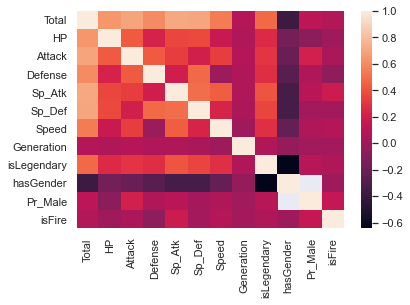

In [114]:
sns.heatmap(df[[
    'Total',           
    'HP',              
    'Attack',          
    'Defense',         
    'Sp_Atk',          
    'Sp_Def',          
    'Speed',           
    'Generation',      
    'isLegendary',     
    'Color',           
    'hasGender',       
    'Pr_Male',      
    'isFire'
    ]].corr(method='pearson'))

In [115]:
df[[
    'Total',           
    'HP',              
    'Attack',          
    'Defense',         
    'Sp_Atk',          
    'Sp_Def',          
    'Speed',           
    'Generation',      
    'isLegendary',     
    'Color',           
    'hasGender',       
    'Pr_Male',      
    'isFire'
    ]].corr(method='pearson')

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,Pr_Male,isFire
Total,1.000000,0.642628,0.704164,0.605831,0.723737,0.706501,0.548890,0.092868,0.481837,-0.385978,0.113564,0.075754
HP,0.642628,1.000000,0.431680,0.228834,0.368640,0.376006,0.170031,0.071545,0.258926,-0.155031,-0.066704,0.004959
Attack,0.704164,0.431680,1.000000,0.433233,0.335205,0.207211,0.335013,0.093857,0.302786,-0.196892,0.213882,0.054249
Defense,0.605831,0.228834,0.433233,1.000000,0.202519,0.483986,-0.008663,0.068409,0.274446,-0.269466,0.063899,-0.054921
Sp_Atk,0.723737,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106,0.069689,0.409739,-0.336579,0.105893,0.180792
Sp_Def,0.706501,0.376006,0.207211,0.483986,0.492861,1.000000,0.233487,0.055421,0.360215,-0.337265,0.017941,0.019135
Speed,0.548890,0.170031,0.335013,-0.008663,0.443106,0.233487,1.000000,0.003920,0.286082,-0.216964,0.070098,0.091439
Generation,0.092868,0.071545,0.093857,0.068409,0.069689,0.055421,0.003920,1.000000,0.071875,-0.029916,0.010912,0.021436
isLegendary,0.481837,0.258926,0.302786,0.274446,0.409739,0.360215,0.286082,0.071875,1.000000,-0.644714,0.095428,0.072667
hasGender,-0.385978,-0.155031,-0.196892,-0.269466,-0.336579,-0.337265,-0.216964,-0.029916,-0.644714,1.000000,NaN,-0.000326


<AxesSubplot:>

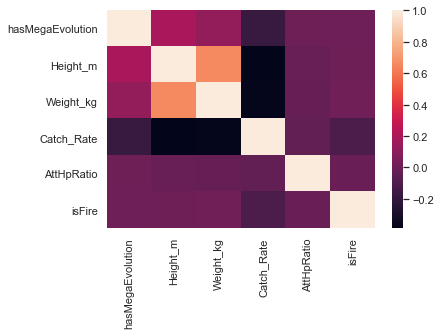

In [116]:
sns.heatmap(df[[
    'Egg_Group_1',     
    'Egg_Group_2',     
    'hasMegaEvolution',
    'Height_m',        
    'Weight_kg',       
    'Catch_Rate',      
    'Body_Style',      
    'AttHpRatio',      
    'isFire',          
    ]].corr(method='pearson'))

In [117]:
df[[
    'Egg_Group_1',     
    'Egg_Group_2',     
    'hasMegaEvolution',
    'Height_m',        
    'Weight_kg',       
    'Catch_Rate',      
    'Body_Style',      
    'AttHpRatio',      
    'isFire',          
    ]].corr(method='pearson')

,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,AttHpRatio,isFire
hasMegaEvolution,1.000000,0.194621,0.129057,-0.173273,0.000967,0.009058
Height_m,0.194621,1.000000,0.661342,-0.382862,-0.012916,0.003879
Weight_kg,0.129057,0.661342,1.000000,-0.367798,-0.019255,0.019358
Catch_Rate,-0.173273,-0.382862,-0.367798,1.000000,-0.032213,-0.104480
AttHpRatio,0.000967,-0.012916,-0.019255,-0.032213,1.000000,-0.008354
isFire,0.009058,0.003879,0.019358,-0.104480,-0.008354,1.000000


<AxesSubplot:>

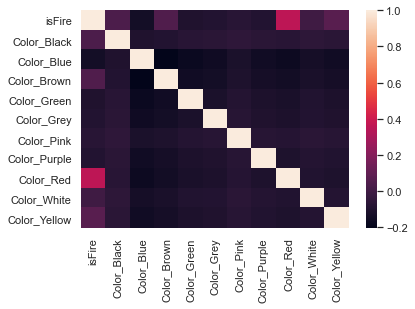

In [118]:
sns.heatmap(df[[
 'isFire',   
 'Color_Black', 
 'Color_Blue', 
 'Color_Brown', 
 'Color_Green', 
 'Color_Grey', 
 'Color_Pink', 
 'Color_Purple', 
 'Color_Red', 
 'Color_White', 
 'Color_Yellow',]].corr(method='pearson'))

In [119]:
df[[
 'isFire',   
 'Color_Black', 
 'Color_Blue', 
 'Color_Brown', 
 'Color_Green', 
 'Color_Grey', 
 'Color_Pink', 
 'Color_Purple', 
 'Color_Red', 
 'Color_White', 
 'Color_Yellow',]].corr(method='pearson')

,isFire,Color_Black,Color_Blue,Color_Brown,Color_Green,Color_Grey,Color_Pink,Color_Purple,Color_Red,Color_White,Color_Yellow
isFire,1.000000,0.038109,-0.138649,0.049811,-0.101796,-0.094403,-0.071256,-0.091346,0.359420,-0.000778,0.073412
Color_Black,0.038109,1.000000,-0.102967,-0.091441,-0.075598,-0.070108,-0.052918,-0.067838,-0.073431,-0.060083,-0.067262
Color_Blue,-0.138649,-0.102967,1.000000,-0.202726,-0.167602,-0.155430,-0.117320,-0.150397,-0.162797,-0.133205,-0.149122
Color_Brown,0.049811,-0.091441,-0.202726,1.000000,-0.148841,-0.138031,-0.104187,-0.133561,-0.144574,-0.118294,-0.132429
Color_Green,-0.101796,-0.075598,-0.167602,-0.148841,1.000000,-0.114116,-0.086136,-0.110421,-0.119525,-0.097799,-0.109485
Color_Grey,-0.094403,-0.070108,-0.155430,-0.138031,-0.114116,1.000000,-0.079880,-0.102401,-0.110845,-0.090696,-0.101533
Color_Pink,-0.071256,-0.052918,-0.117320,-0.104187,-0.086136,-0.079880,1.000000,-0.077293,-0.083667,-0.068458,-0.076638
Color_Purple,-0.091346,-0.067838,-0.150397,-0.133561,-0.110421,-0.102401,-0.077293,1.000000,-0.107255,-0.087759,-0.098245
Color_Red,0.359420,-0.073431,-0.162797,-0.144574,-0.119525,-0.110845,-0.083667,-0.107255,1.000000,-0.094995,-0.106346
Color_White,-0.000778,-0.060083,-0.133205,-0.118294,-0.097799,-0.090696,-0.068458,-0.087759,-0.094995,1.000000,-0.087015


<AxesSubplot:>

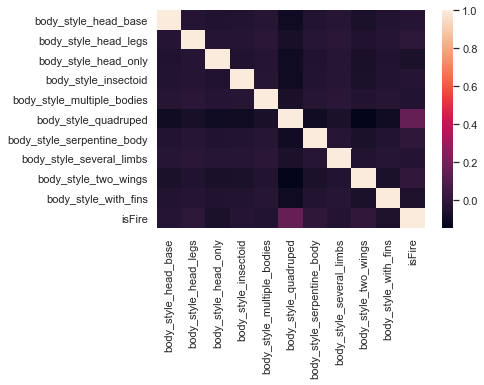

In [120]:
sns.heatmap(df[[      
    'body_style_head_base',        
    'body_style_head_legs',        
    'body_style_head_only',        
    'body_style_insectoid',        
    'body_style_multiple_bodies',  
    'body_style_quadruped',        
    'body_style_serpentine_body',  
    'body_style_several_limbs',    
    'body_style_two_wings',        
    'body_style_with_fins',
    'isFire']].corr(method='pearson'))

In [121]:
df[[      
    'body_style_head_base',        
    'body_style_head_legs',        
    'body_style_head_only',        
    'body_style_insectoid',        
    'body_style_multiple_bodies',  
    'body_style_quadruped',        
    'body_style_serpentine_body',  
    'body_style_several_limbs',    
    'body_style_two_wings',        
    'body_style_with_fins',
    'isFire']].corr(method='pearson')

,body_style_head_base,body_style_head_legs,body_style_head_only,body_style_insectoid,body_style_multiple_bodies,body_style_quadruped,body_style_serpentine_body,body_style_several_limbs,body_style_two_wings,body_style_with_fins,isFire
body_style_head_base,1.000000,-0.032379,-0.046354,-0.043415,-0.030371,-0.100009,-0.042655,-0.028234,-0.064473,-0.044165,-0.034515
body_style_head_legs,-0.032379,1.000000,-0.034570,-0.032379,-0.022651,-0.074586,-0.031811,-0.021057,-0.048083,-0.032938,-0.010942
body_style_head_only,-0.046354,-0.034570,1.000000,-0.046354,-0.032427,-0.106777,-0.045541,-0.030145,-0.068836,-0.047154,-0.064557
body_style_insectoid,-0.043415,-0.032379,-0.046354,1.000000,-0.030371,-0.100009,-0.042655,-0.028234,-0.064473,-0.044165,-0.034515
body_style_multiple_bodies,-0.030371,-0.022651,-0.032427,-0.030371,1.000000,-0.069962,-0.029839,-0.019751,-0.045102,-0.030896,-0.042299
body_style_quadruped,-0.100009,-0.074586,-0.106777,-0.100009,-0.069962,1.000000,-0.098257,-0.065039,-0.148517,-0.101736,0.152954
body_style_serpentine_body,-0.042655,-0.031811,-0.045541,-0.042655,-0.029839,-0.098257,1.000000,-0.027740,-0.063344,-0.043391,-0.006658
body_style_several_limbs,-0.028234,-0.021057,-0.030145,-0.028234,-0.019751,-0.065039,-0.027740,1.000000,-0.041929,-0.028722,-0.039322
body_style_two_wings,-0.064473,-0.048083,-0.068836,-0.064473,-0.045102,-0.148517,-0.063344,-0.041929,1.000000,-0.065586,0.001960
body_style_with_fins,-0.044165,-0.032938,-0.047154,-0.044165,-0.030896,-0.101736,-0.043391,-0.028722,-0.065586,1.000000,-0.061509


In [122]:
df = df.drop([ 
    
    'Color_Green', 
    'Color_Grey', 
    'Color_Pink', 
    'Color_Purple', 
    'Color_White', 
    'body_style_bipedal_tailed',        
    'body_style_bipedal_tailless',     
    'body_style_four_wings',      
    'body_style_head_arms',        
    'body_style_head_base',             
    'body_style_head_only',        
    'body_style_insectoid',        
    'body_style_multiple_bodies',
    'body_style_serpentine_body',  
    'body_style_several_limbs',    
    'body_style_two_wings',    
    
    'Egg_Group_Amorphous', 
    'Egg_Group_Bug',  
    'Egg_Group_Ditto', 
    'Egg_Group_Dragon',
    'Egg_Group_Fairy', 
    'Egg_Group_Flying',
    'Egg_Group_Grass',
    'Egg_Group_Human-Like',
    'Egg_Group_Mineral',
    'Egg_Group_Monster', 
    'Egg_Group_Undiscovered',
    'Egg_Group_Water_1',
    'Egg_Group_Water_2',
    'Egg_Group_Water_3',
],axis=1)

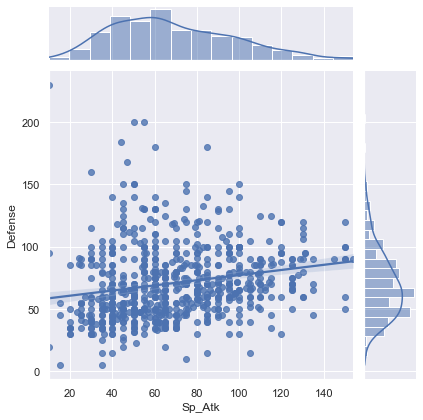

In [123]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.jointplot("Sp_Atk", "Defense", data=df, kind='reg')

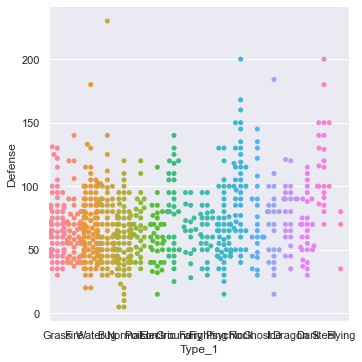

In [124]:
sns.catplot(x="Type_1", y="Defense", kind="swarm", data=df)

In [125]:
print('PS 2.5 Probability of each Pokemon being a Fire Type')
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X = df[["Sp_Atk", "body_style_quadruped", "Color_Red",'Color_Blue',"body_style_with_fins", 'Egg_Group_Field']]

logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X, df["isFire"])
predictions = logistic_model.predict(X)
accuracy = metrics.accuracy_score(predictions,df["isFire"])
print(accuracy)

PS 2.5 Probability of each Pokemon being a Fire Type
0.8321775312066574


In [126]:
df[["Sp_Atk", "body_style_quadruped", "Color_Red",'Color_Blue',"body_style_with_fins", 'Egg_Group_Field','isFire']].corr(method='pearson')

,Sp_Atk,body_style_quadruped,Color_Red,Color_Blue,body_style_with_fins,Egg_Group_Field,isFire
Sp_Atk,1.000000,-0.019726,0.027267,0.039553,-0.036334,-0.075080,0.180792
body_style_quadruped,-0.019726,1.000000,-0.105314,-0.019104,-0.101736,0.447810,0.152954
Color_Red,0.027267,-0.105314,1.000000,-0.162797,0.017364,0.004507,0.359420
Color_Blue,0.039553,-0.019104,-0.162797,1.000000,0.162391,-0.121280,-0.138649
body_style_with_fins,-0.036334,-0.101736,0.017364,0.162391,1.000000,-0.085001,-0.061509
Egg_Group_Field,-0.075080,0.447810,0.004507,-0.121280,-0.085001,1.000000,0.255340
isFire,0.180792,0.152954,0.359420,-0.138649,-0.061509,0.255340,1.000000


In [127]:
logistic_model.coef_

array([[ 0.03789279,  0.95105294,  2.9047101 , -2.7463186 , -0.9644202 ,
         1.92261465]])

In [128]:
df["pred"] = predictions
prob =[x[1] for x in logistic_model.predict_proba(X)]

df["prob"] = prob
selection = df[["Name","isFire","pred", "prob"]]
selection[selection["isFire"] == True].sample(20)

,Name,isFire,pred,prob
227,Houndour,True,True,0.791509
667,Pyroar,True,True,0.919305
662,Talonflame,True,True,0.757263
76,Ponyta,True,True,0.682580
58,Arcanine,True,True,0.890113
256,Blaziken,True,True,0.988161
661,Fletchinder,True,True,0.611984
635,Larvesta,True,False,0.064380
389,Chimchar,True,False,0.389206
499,Emboar,True,True,0.982801


In [129]:
pd.DataFrame(list(zip(X.columns, logistic_model.coef_)))

,0,1
0,Sp_Atk,"[0.03789279426002837, 0.9510529399794577, 2.90..."


In [130]:
logistic_model = LogisticRegression(class_weight="balanced")

from sklearn.model_selection import  train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[["Sp_Atk", 
                                                        "body_style_quadruped", 
                                                        "Color_Red",
                                                        'Color_Blue',
                                                        "body_style_with_fins"]], 
                                                    df[['isFire']], train_size = 0.55)


logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

In [131]:
train_accuracy

0.8156565656565656

In [132]:
test_accuracy

0.8061538461538461

## PS 2.6 Accuracy of the Model

In [133]:
print('PS 2.6 Accuracy of the Model')
accuracy

PS 2.6 Accuracy of the Model


0.8321775312066574

In [134]:
print("Accuracy:",metrics.accuracy_score(Y_test, pred_test))
print("Precision:",metrics.precision_score(Y_test, pred_test))
print("Recall:",metrics.recall_score(Y_test, pred_test))

Accuracy: 0.8061538461538461
Precision: 0.2625
Recall: 0.84


In [135]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_train, pred_train)
cnf_matrix

array([[298,  67],
       [  6,  25]], dtype=int64)

Text(0.5, 527.9871999999999, 'Predicted label')

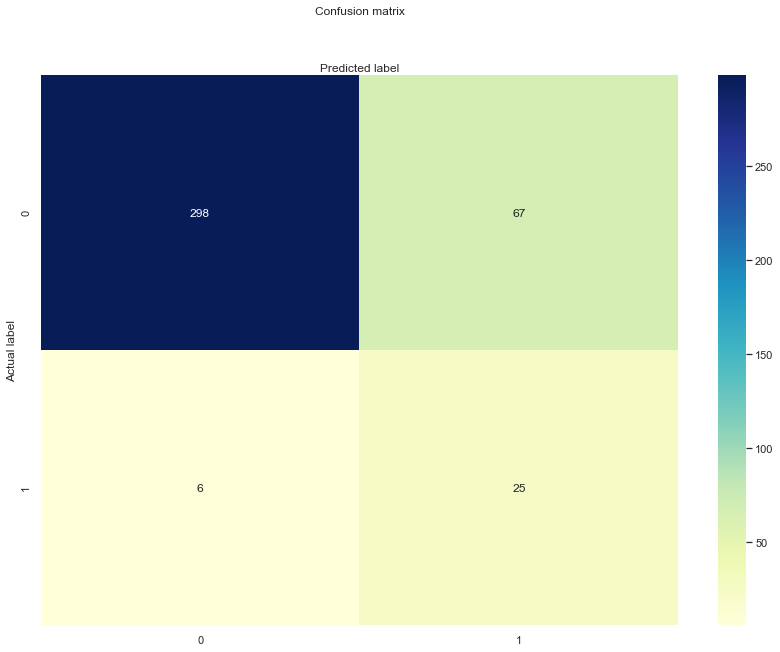

In [136]:
class_names=["0","1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [137]:
X.head()

,Sp_Atk,body_style_quadruped,Color_Red,Color_Blue,body_style_with_fins,Egg_Group_Field
0,65,1,0,0,0,0
1,80,1,0,0,0,0
2,100,1,0,0,0,0
3,60,0,1,0,0,0
4,80,0,1,0,0,0


## PS 2.8 Upsampling for the minority class that is Fire Type
show the change in Accuracy and Precision

In [138]:
'''
df = pd.read_csv("Pokemon.csv")
df['isFire'] = (df['Type_1'] == 'Fire') | (df['Type_2'] == 'Fire')

col = pd.get_dummies(df.Color,prefix='Color')
col2 = pd.get_dummies(df.Body_Style,prefix='body_style')
df = df.join(col)
df = df.join(col2)

df = df.drop([ 
    'Color_Green', 
    'Color_Grey', 
    'Color_Pink', 
    'Color_Purple', 
    'Color_White', 
    'body_style_bipedal_tailed',        
    'body_style_bipedal_tailless',     
    'body_style_four_wings',      
    'body_style_head_arms',        
    'body_style_head_base',             
    'body_style_head_only',        
    'body_style_insectoid',        
    'body_style_multiple_bodies',
    'body_style_serpentine_body',  
    'body_style_several_limbs',    
    'body_style_two_wings',        
],axis=1)
'''

'\ndf = pd.read_csv("Pokemon.csv")\ndf[\'isFire\'] = (df[\'Type_1\'] == \'Fire\') | (df[\'Type_2\'] == \'Fire\')\n\ncol = pd.get_dummies(df.Color,prefix=\'Color\')\ncol2 = pd.get_dummies(df.Body_Style,prefix=\'body_style\')\ndf = df.join(col)\ndf = df.join(col2)\n\ndf = df.drop([ \n    \'Color_Green\', \n    \'Color_Grey\', \n    \'Color_Pink\', \n    \'Color_Purple\', \n    \'Color_White\', \n    \'body_style_bipedal_tailed\',        \n    \'body_style_bipedal_tailless\',     \n    \'body_style_four_wings\',      \n    \'body_style_head_arms\',        \n    \'body_style_head_base\',             \n    \'body_style_head_only\',        \n    \'body_style_insectoid\',        \n    \'body_style_multiple_bodies\',\n    \'body_style_serpentine_body\',  \n    \'body_style_several_limbs\',    \n    \'body_style_two_wings\',        \n],axis=1)\n'

In [139]:
'''
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

df = df.reset_index()
X = df[["Sp_Atk",
        "body_style_quadruped",
        "Color_Red",
        "body_style_with_fins"]]


X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df["isFire"], 
                   test_size=0.3,  
                   train_size=0.7,    
                   random_state=42)

logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)
'''

'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.utils import resample\n\ndf = df.reset_index()\nX = df[["Sp_Atk",\n        "body_style_quadruped",\n        "Color_Red",\n        "body_style_with_fins"]]\n\n\nX_train, X_test, Y_train, Y_test = train_test_split(X, \n                   df["isFire"], \n                   test_size=0.3,  \n                   train_size=0.7,    \n                   random_state=42)\n\nlogistic_model = LogisticRegression(class_weight="balanced")\nlogistic_model.fit(X_train, Y_train)\npred_train = logistic_model.predict(X_train)\npred_test =  logistic_model.predict(X_test)\ntrain_accuracy = metrics.accuracy_score(pred_train,Y_train)\ntest_accuracy = metrics.accuracy_score(pred_test,Y_test)\n'

### Initial Accuracy and Precision

In [140]:
print("Accuracy:",metrics.accuracy_score(Y_test, pred_test))
print("Precision:",metrics.precision_score(Y_test, pred_test)) # Specificity
print("Recall:",metrics.recall_score(Y_test, pred_test)) # Sensitivity

Accuracy: 0.8061538461538461
Precision: 0.2625
Recall: 0.84


Text(0.5, 527.9871999999999, 'Predicted label')

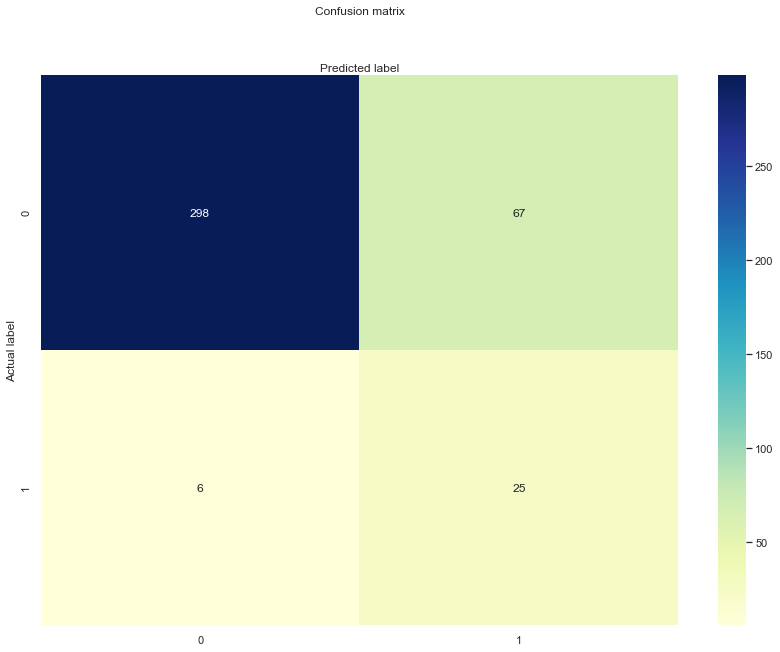

In [141]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_train, pred_train)

class_names=["0","1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [142]:
X = df[["Sp_Atk",
        "body_style_quadruped",
        "Color_Red",
        'Color_Blue',
        "body_style_with_fins"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df["isFire"], 
                   test_size=0.3,  
                   train_size=0.7,    
                   random_state=42)

X = pd.concat([X_train, Y_train], axis=1)


not_fire = X[X.isFire==False]
is_fire = X[X.isFire==True]
fire_upsampled = resample(is_fire,
                          replace=True, # sample with replacement
                          n_samples=len(not_fire), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
fire_upsampled = pd.concat([not_fire, fire_upsampled])

# check new class counts
fire_upsampled.isFire.value_counts()

False    461
True     461
Name: isFire, dtype: int64

In [143]:
Y_train = fire_upsampled.isFire
X_train = fire_upsampled.drop('isFire', axis=1)

fire_upsampled = LogisticRegression(class_weight="balanced", solver="liblinear").fit(X_train, Y_train)

upsampled_pred = fire_upsampled.predict(X_test)

### Resampled Accuracy and Precision

In [144]:
print("Accuracy:",metrics.accuracy_score(Y_test, upsampled_pred))
print("Precision:",metrics.precision_score(Y_test, upsampled_pred))
print("Recall:",metrics.recall_score(Y_test, upsampled_pred))

Accuracy: 0.847926267281106
Precision: 0.2619047619047619
Recall: 0.8461538461538461


Text(0.5, 527.9871999999999, 'Predicted label')

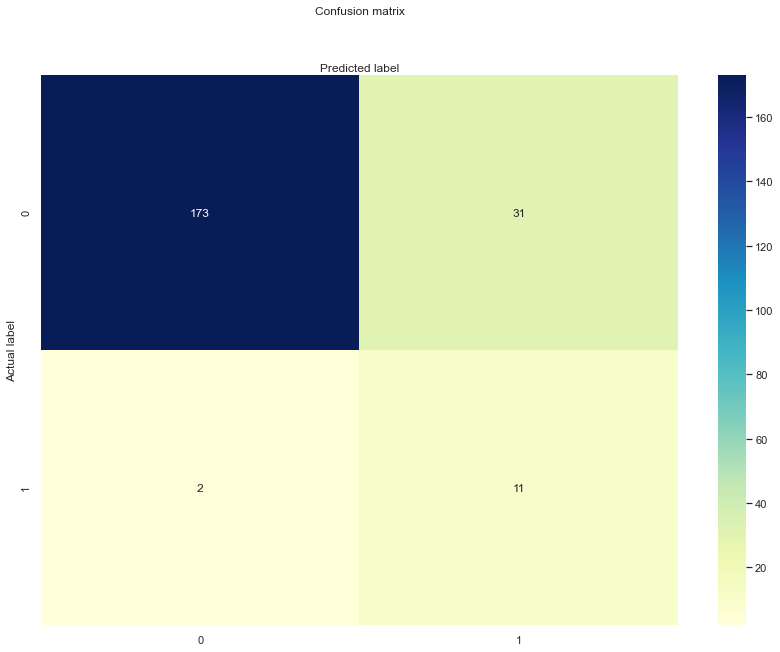

In [145]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, upsampled_pred)
cnf_matrix

class_names=["0","1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')